In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('./Datasets/Telecom Churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Feature Engineering

In [4]:
df.shape

(7043, 21)

In [5]:
df.customerID.nunique()

7043

In [6]:
df = df.drop('customerID', axis=1)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [9]:
df.Churn.value_counts()/df.shape[0] # It is imbalanced dataset, so some technique must be used to fix this issue

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [10]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [11]:
(56.95*34)

1936.3000000000002

In [12]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
df[df['TotalCharges'] == ' '].shape # There are empty values. We need to fill them using (Monthly Charge*Tenure)

(11, 20)

In [14]:
df['TotalCharges'] = np.where(df['TotalCharges'] == ' ', df['MonthlyCharges']*df['tenure'], df['MonthlyCharges'])
# 0 tenure means never applied for activation

In [15]:
df['gender'].value_counts().values.sum()

7043

In [16]:
df['gender'] = np.where(df['gender'] == 'Male', 0, 1)
df['Partner'] = np.where(df['Partner'] == 'Yes', 1, 0)
df['Dependents'] = np.where(df['Dependents'] == 'Yes', 1, 0)
df['PhoneService'] = np.where(df['PhoneService'] == 'Yes', 1, 0)
df['OnlineSecurity'] = np.where(df['OnlineSecurity'] == 'Yes', 1, 0)
df['OnlineBackup'] = np.where(df['OnlineBackup'] == 'Yes', 1, 0)
df['DeviceProtection'] = np.where(df['DeviceProtection'] == 'Yes', 1, 0)
df['TechSupport'] = np.where(df['TechSupport'] == 'Yes', 1, 0)
df['StreamingTV'] = np.where(df['StreamingTV'] == 'Yes', 1, 0)
df['StreamingMovies'] = np.where(df['StreamingMovies'] == 'Yes', 1, 0)
df['PaperlessBilling'] = np.where(df['PaperlessBilling'] == 'Yes', 1, 0)
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

In [17]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,56.95,0
2,0,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,53.85,1
3,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,42.30,0
4,1,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,Yes,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,84.80,0
7039,1,0,1,1,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,103.20,0
7040,1,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,29.60,0
7041,0,1,1,0,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,74.40,1


In [18]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [19]:
df['MultipleLines'] = df['MultipleLines'].apply(lambda x: 1 if x=='Yes' else 0)

In [20]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [21]:
df['InternetService'] = df['InternetService'].map({'Fiber optic':2, 'DSL':1, 'No':0})

In [22]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [23]:
df['Contract'] = df['Contract'].map({'Month-to-month':2, 'Two year':1, 'One year':0})

In [24]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [25]:
df = pd.get_dummies(df, columns = ['PaymentMethod'])

In [26]:
df.dtypes

gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
MultipleLines                                int64
InternetService                              int64
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
Contract                                     int64
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
PaymentMethod_Bank transfer (au

# EDA

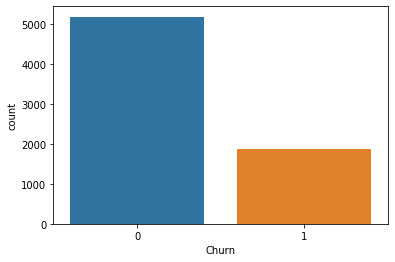

In [27]:
sns.countplot('Churn', data=df)

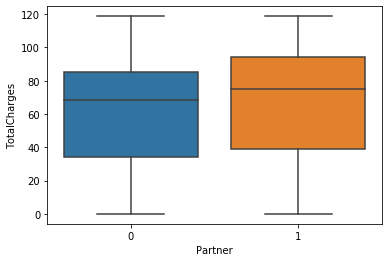

In [28]:
sns.boxplot(x='Partner', y='TotalCharges', data=df) # Generally having a partner means more TotalCharge

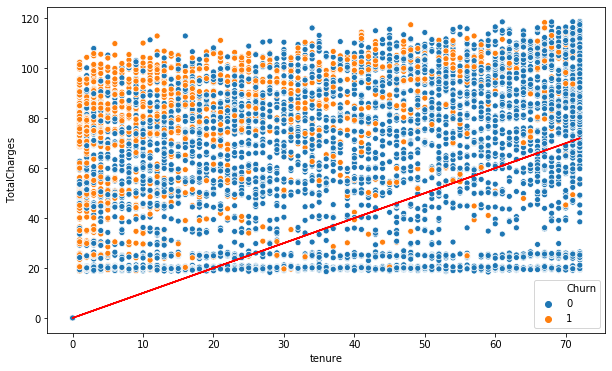

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='TotalCharges', data=df, hue='Churn') 
plt.plot(df['tenure'], df['tenure'],'r')
# means if charges are high when tenure is low, they tend to leave 

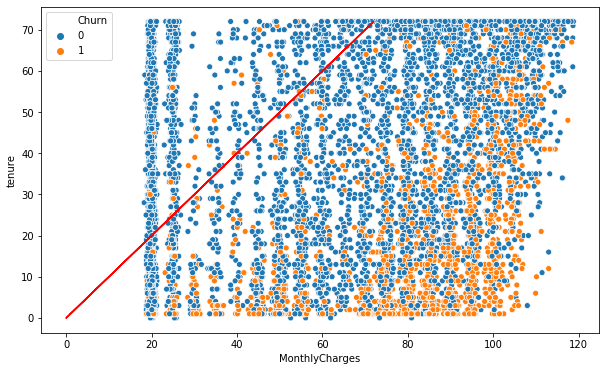

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MonthlyCharges', y='tenure', data=df, hue='Churn')
plt.plot(df['tenure'], df['tenure'],'r')

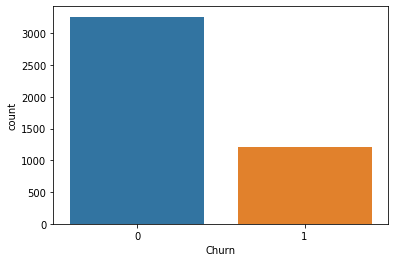

In [31]:
sns.countplot(x='Churn', data = df[(df['InternetService'] == 1) | (df['OnlineSecurity'] == 1) | (df['StreamingMovies'] == 1)])
# Means people opting for these services tend to stay longer

# Feature Selection

In [32]:
X = df.drop('Churn', axis=1).values
y = df['Churn'].values

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [35]:
X_train.shape, X_test.shape

((4930, 22), (2113, 22))

In [36]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [37]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# SMOTE 
from imblearn.over_sampling import SMOTE 

In [39]:
sm = SMOTE(random_state=42)

In [40]:
X_train, y_train = sm.fit_resample(X_train, y_train)

In [41]:
X_train.shape, X_test.shape

((7244, 22), (2113, 22))

In [42]:
pd.Series(y_train).value_counts()

1    3622
0    3622
dtype: int64

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
model = Sequential()

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [45]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience= 25)

In [46]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 600, batch_size = 32, callbacks = [early_stop])

Train on 7244 samples, validate on 2113 samples
Epoch 1/600
7244/7244 [==============================] - 1s 97us/sample - loss: 0.6673 - val_loss: 0.6016
Epoch 2/600
7244/7244 [==============================] - 0s 29us/sample - loss: 0.6165 - val_loss: 0.5663
Epoch 3/600
7244/7244 [==============================] - 0s 28us/sample - loss: 0.5897 - val_loss: 0.5408
Epoch 4/600
7244/7244 [==============================] - 0s 27us/sample - loss: 0.5645 - val_loss: 0.5154
Epoch 5/600
7244/7244 [==============================] - 0s 27us/sample - loss: 0.5532 - val_loss: 0.5117
Epoch 6/600
7244/7244 [==============================] - 0s 28us/sample - loss: 0.5537 - val_loss: 0.5096
Epoch 7/600
7244/7244 [==============================] - 0s 27us/sample - loss: 0.5411 - val_loss: 0.5015
Epoch 8/600
7244/7244 [==============================] - 0s 27us/sample - loss: 0.5323 - val_loss: 0.4876
Epoch 9/600
7244/7244 [==============================] - 0s 27us/sample - loss: 0.5286 - val_loss: 0.490

In [47]:
losses = pd.DataFrame(model.history.history)

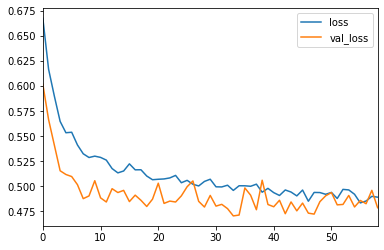

In [48]:
losses.plot()

In [49]:
predictions = model.predict_classes(X_test)

In [50]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1552
           1       0.53      0.74      0.62       561

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.79      0.76      0.77      2113



In [52]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1188  364]
 [ 148  413]]


Text(33.0, 0.5, 'Actual')

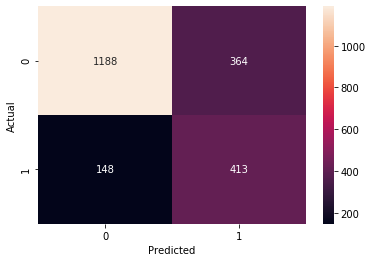

In [53]:
sns.heatmap(cm, fmt='g', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [54]:
f1_score(y_test, predictions)

0.6173393124065769

In [55]:
# Applying SMOTE actually increases testing performance